Adatok lekérése APIN keresztül

In [94]:
import requests
def get_daily_temperatures(varid, fromdate, todate, statid=None):
    base_url = "https://aszalymonitoring.vizugy.hu/api.php"
    params = {
        "view": "getmeas",
        "varid": varid,
        "fromdate": fromdate,
        "todate": todate,
    }
    
    if statid:
        params["statid"] = statid
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Hiba történt az adatok lekérése során.")
        return None

def get_stations():
    base_url = "https://aszalymonitoring.vizugy.hu/api.php"
    params = {
        "view": "getstations"
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Hiba történt az adatok lekérése során.")
        return None

def save_to_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# Példa használatra az állomások lekérdezésére
stations_filename = "stations.json"
stations = get_stations()
if stations is not None:
    save_to_json(stations, stations_filename)
    print(f"Az állomások adatai sikeresen elmentve: {stations_filename}")
else:
    print("Nem sikerült lekérni az állomások adatait.")

# hőmérsékleti adatok lekérdezésére egy adott állomásra
temperatures_filename = "daily_temperatures.json"
varid = "1"  # Hőmérsékleti paraméter azonosítója
fromdate = "2000-01-31"
todate = "2024-01-31"
statid = "07F16A43-6FBA-4A77-A22A-BFE79D336204"  # Az állomás azonosítója

daily_temperatures = get_daily_temperatures(varid, fromdate, todate, statid)
if daily_temperatures is not None:
    save_to_json(daily_temperatures, temperatures_filename)
    print(f"A hőmérsékleti adatok sikeresen elmentve: {temperatures_filename}")
else:
    print("Nem sikerült lekérni a hőmérsékleti adatokat az adott állomásra.")

Az állomások adatai sikeresen elmentve: stations.json
A hőmérsékleti adatok sikeresen elmentve: daily_temperatures.json


In [65]:
import pandas as pd
import json
import matplotlib as plt
import pandas as pd

# JSON fájl betöltése egy DataFrame-be
df = pd.read_json('daily_temperatures.json')

# Az 'entries' oszlopban lévő adatok kibontása egy listába
entries_list = df['entries'].iloc[0]

# Új DataFrame létrehozása a kibontott adatokból, ahol minden sor egy dátum és az ahhoz tartozó értékek
structured_df = pd.DataFrame(entries_list).T.reset_index(drop=True)

# Az első néhány sor megjelenítése a jól struktúrált DataFrame-ből
structured_df.head()


,value,date
0,None,2018-04-29 05:00:00.000
1,None,2018-04-29 06:00:00.000
2,None,2018-04-29 07:00:00.000
3,None,2018-04-29 08:00:00.000
4,None,2018-04-29 09:00:00.000


In [66]:
# Swap the 'value' and 'date' columns in the structured DataFrame
swapped_df = structured_df[['date', 'value']]

# Display the first few rows of the DataFrame with swapped columns
swapped_df.head()

,date,value
0,2018-04-29 05:00:00.000,None
1,2018-04-29 06:00:00.000,None
2,2018-04-29 07:00:00.000,None
3,2018-04-29 08:00:00.000,None
4,2018-04-29 09:00:00.000,None


In [67]:
# Convert the 'value' column to float
swapped_df['value'] = swapped_df['value'].astype(float)

# Display the data types of the DataFrame to confirm the conversion


In [68]:
# Convert the 'date' column to datetime format, then extract just the date part
swapped_df['date'] = pd.to_datetime(swapped_df['date']).dt.date
swapped_df = swapped_df.dropna(subset=['value'])

In [69]:
swapped_df

,date,value
20,2018-04-30,19.5
21,2018-04-30,19.4
22,2018-04-30,18.5
23,2018-04-30,17.0
24,2018-04-30,18.6
...,...,...
50422,2024-01-31,-0.9
50423,2024-01-31,-1.6
50424,2024-01-31,-2.2
50425,2024-01-31,-2.4


In [70]:
# Aggregate the data by 'date', calculating the average 'value' for each date
aggregated_df = swapped_df.groupby('date')['value'].mean().reset_index()

In [71]:
aggregated_df

,date,value
0,2018-04-30,21.882609
1,2018-05-01,18.825000
2,2018-05-02,21.279167
3,2018-05-03,20.450000
4,2018-05-04,21.287500
...,...,...
2091,2024-01-27,5.404167
2092,2024-01-28,2.329167
2093,2024-01-29,-1.258333
2094,2024-01-30,-1.345833


In [72]:
# Round the 'value' column to one decimal place
aggregated_df['value'] = aggregated_df['value'].round(1)

In [73]:
df = aggregated_df

In [74]:
df

,date,value
0,2018-04-30,21.9
1,2018-05-01,18.8
2,2018-05-02,21.3
3,2018-05-03,20.4
4,2018-05-04,21.3
...,...,...
2091,2024-01-27,5.4
2092,2024-01-28,2.3
2093,2024-01-29,-1.3
2094,2024-01-30,-1.3


<AxesSubplot: >

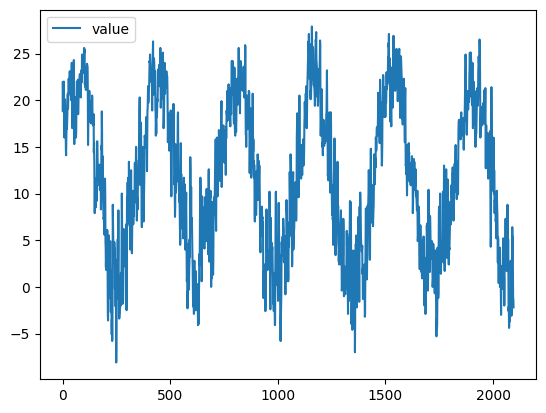

In [75]:
df.plot()

In [76]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

<AxesSubplot: xlabel='date'>

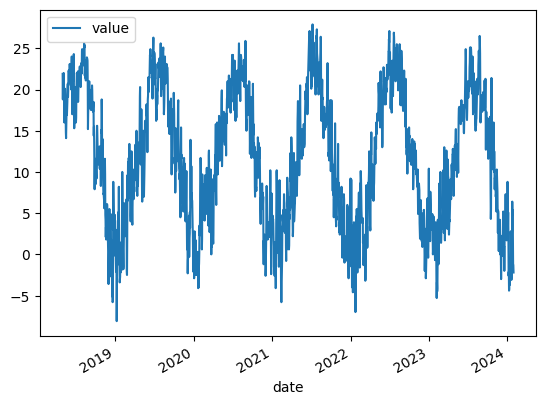

In [77]:
df.plot()

In [93]:
pip install neuralprophet

  Using cached neuralprophet-0.5.4-py3-none-any.whl (128 kB)
  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
  Using cached holidays-0.41-py3-none-any.whl.metadata (21 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached dash-2.8.1-py3-none-any.whl (9.9 MB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
  Using cached neuralprophet-0.5.3-py3-none-any.whl (132 kB)
  Using cached neuralprophet-0.5.2-py3-none-any.whl (146 kB)
  Using cached pytorch_lightning-2.1.4-py3-none-any.whl.metadata (21 kB)
  Using cached torch-2.2.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached torchmetrics-1.3.0.post0-py3-none-any.whl.metadata (20 kB)
  Using cac

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [7 lines of output]
  ERROR: Could not find a version that satisfies the requirement setuptools (from versions: none)
  ERROR: No matching distribution found for setuptools
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

pip subprocess to install build dependencies did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [94]:
#https://edu.machinelearningplus.com/s/pages/ds-career-path